In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
 

df = pd.read_csv("../data/train.csv")

In [20]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
from typing import Tuple

def feature_selection(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    features = df.drop(columns=["SalePrice", "Id"])
    target = 'SalePrice'

    X = df[features.columns]
    y = df[target]
    return X, y

In [ ]:
X, y = feature_selection(df)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_pred=y_pred, y_true=y_test)

ValueError: could not convert string to float: 'RL'

So we need to have only numerical features first!

In [30]:
def feature_selection(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    features = df.drop(columns=["SalePrice", "Id"])
    target = 'SalePrice'
    features = features.select_dtypes(include=["int64", "float64"])

    X = df[features.columns]
    y = df[target]
    return X, y

In [32]:
X, y = feature_selection(df)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_pred=y_pred, y_true=y_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

So instead of not using all features, having to find strategies for NaN's, let's do it a little bit different. We will choose well known methods for categorical and numerical features. We will encode categoricals, input the missing strings with the most frequent, and also input Nan's as the average. Let's see where it gets us.

In [41]:
train_data = pd.read_csv("../data/train.csv")
train_data.drop(columns=["Id"], inplace=True)

y = train_data["SalePrice"]
X = train_data.drop(columns=["SalePrice"])

num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)


y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")


RMSE: 29475.47


Not bad. Let's see if just using XGBoost we can get a better perf.

In [42]:
train_data = pd.read_csv("../data/train.csv")
train_data.drop(columns=["Id"], inplace=True)

y = train_data["SalePrice"]
X = train_data.drop(columns=["SalePrice"])

num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(objective='reg:squarederror', random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)


y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 26618.09


Not worth the extra dependency just for a little improvement yet.

In [44]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Standard deviation is quite high for this. If we transform it, we might have a less skewed distribution.

In [46]:
%pip install -q seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_50991/2941031924.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y, label="target", shade=True)


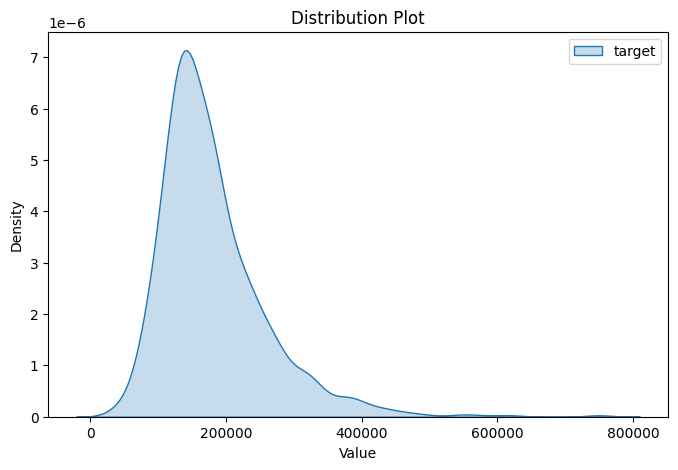

In [50]:
plt.figure(figsize=(8, 5))
sns.kdeplot(y, label="target", shade=True)

# Labels and legend
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Distribution Plot")
plt.legend()
plt.show()

/tmp/ipykernel_50991/2941092175.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log1p(train_data["SalePrice"]), label="target", shade=True)


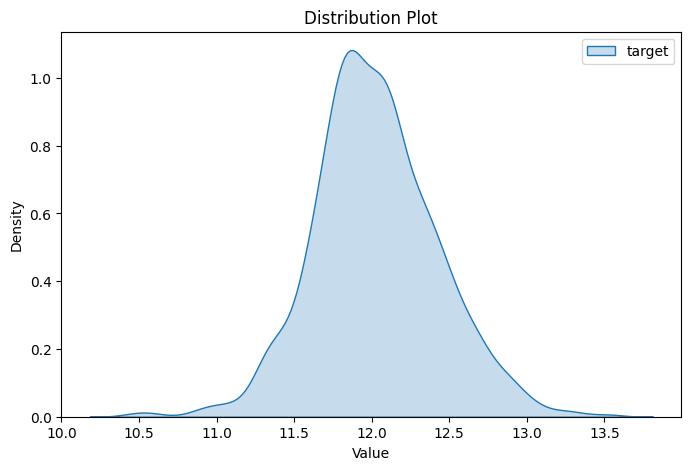

In [51]:
plt.figure(figsize=(8, 5))
sns.kdeplot(np.log1p(train_data["SalePrice"]), label="target", shade=True)

# Labels and legend
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Distribution Plot")
plt.legend()
plt.show()

It normalizes y, so it's a great idea.

In [53]:
train_data = pd.read_csv("../data/train.csv")
train_data.drop(columns=["Id"], inplace=True)

# add a log transformation to y
y = np.log1p(train_data["SalePrice"])
X = train_data.drop(columns=["SalePrice"])

# Let's break down categorical and numericals
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns


num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Median is more robust to outliers
    ("scaler", StandardScaler()),
    # ("power_transform", PowerTransformer(method="yeo-johnson")) # Normalize skewed data
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")


RMSE: 0.13


Good enough for me. Let's see if we hyper parameter tune this and use XGBoost, it will enhance even further

In [56]:
train_data = pd.read_csv("../data/train.csv")
train_data.drop(columns=["Id"], inplace=True)

# add a log transformation to y
y = np.log1p(train_data["SalePrice"])
X = train_data.drop(columns=["SalePrice"])

# Let's break down categorical and numericals
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

# Preprocessing pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Median is more robust to outliers
    ("scaler", StandardScaler()),
    # ("power_transform", PowerTransformer(method="yeo-johnson")) # Normalize skewed data
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Define model pipeline with hyperparameter tuning
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.7, 0.9, 1.0]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", grid_search)
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.13


No improvements. It's already a great model with LinearRegression(). Let's also check for overfitting with cross validation:

In [57]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and compute RMSE for each fold
cross_val_rmse = cross_val_score(model_pipeline, X, y, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
print(f"Cross-validated RMSE: {-cross_val_rmse.mean():.2f} ± {cross_val_rmse.std():.2f}")


Cross-validated RMSE: 0.12 ± 0.01


### Monitoring basics
This is the minimum that we can add in to ensure that our target meets certain criteria.
With more time we could evolve this into multiple other steps of the pipeline, to ensure data has quality before actually provisioning infra to train the model

In [ ]:
%pip install -q whylogs

Note: you may need to restart the kernel to use updated packages.


In [6]:
df["SalePrice"].isna().sum()

np.int64(0)

In [16]:
import whylogs as why
from whylogs.core.constraints import ConstraintsBuilder
from whylogs.core.constraints.factories import null_percentage_below_number, is_non_negative

profile_view = why.log(df).view()

builder = ConstraintsBuilder(dataset_profile_view=profile_view)
builder.add_constraint(
    null_percentage_below_number(column_name="SalePrice", number=0.01)
)
builder.add_constraint(
    is_non_negative(column_name="SalePrice")
)
constraints = builder.build()
constraints.validate()

True

In [18]:
constraints.report()

/tmp/ipykernel_50991/3063409821.py:1: DeprecationWarning: Please use generate_constraints_report()
  constraints.report()


[('null percentage of SalePrice lower than 0.01', 1, 0),
 ('SalePrice is non negative', 1, 0)]